In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Checking for the outliers

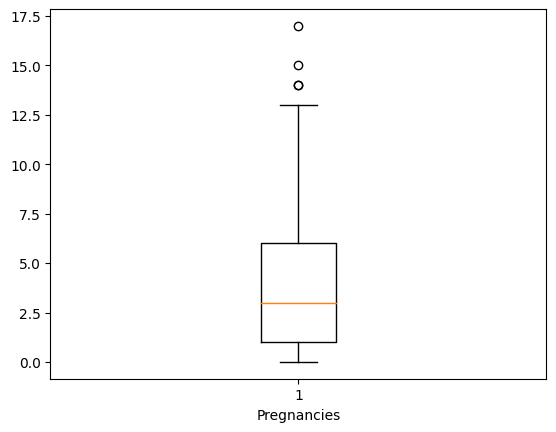

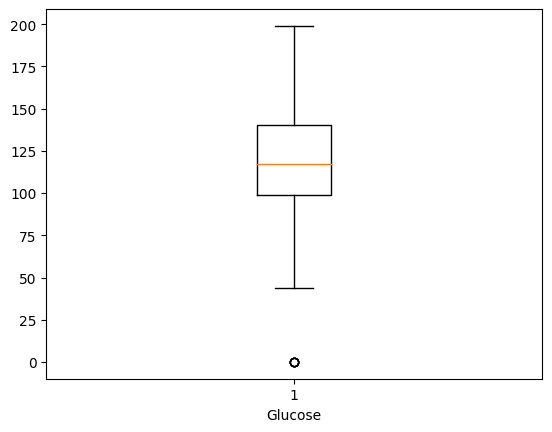

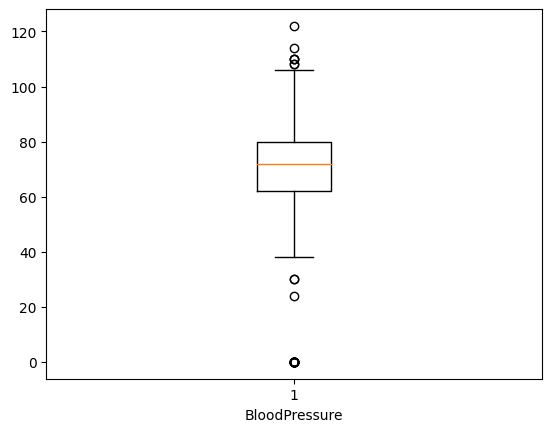

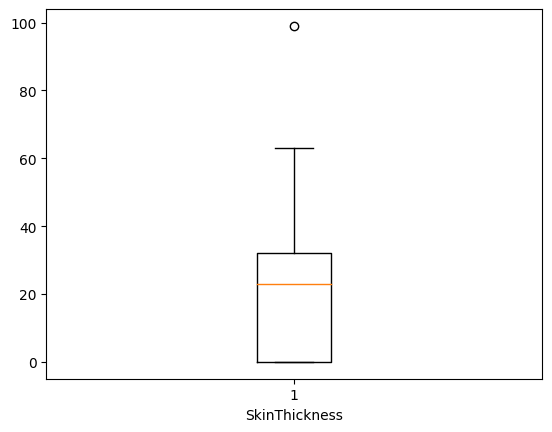

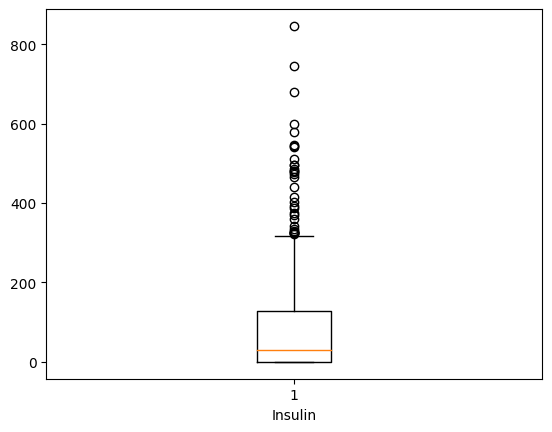

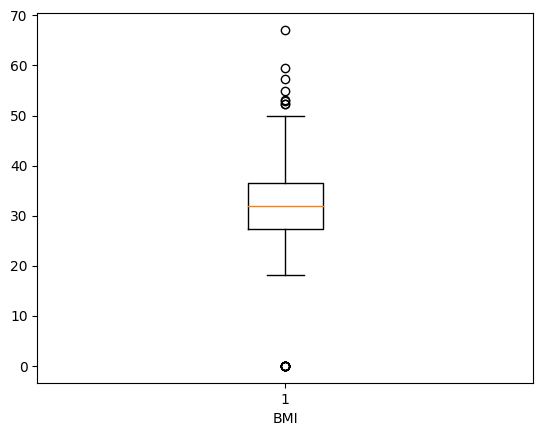

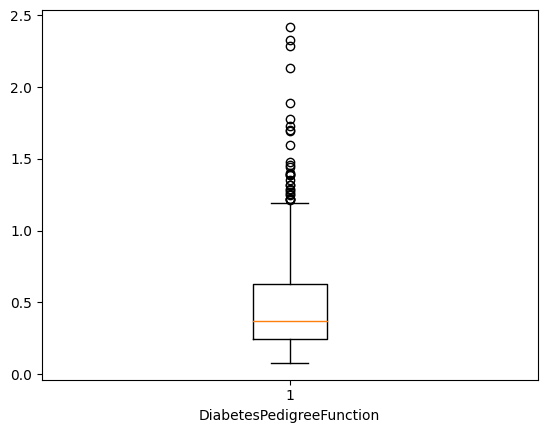

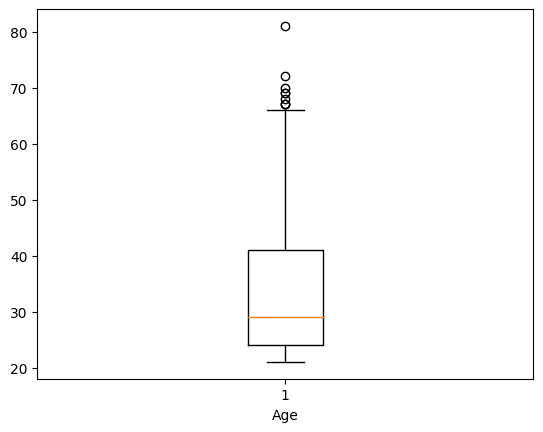

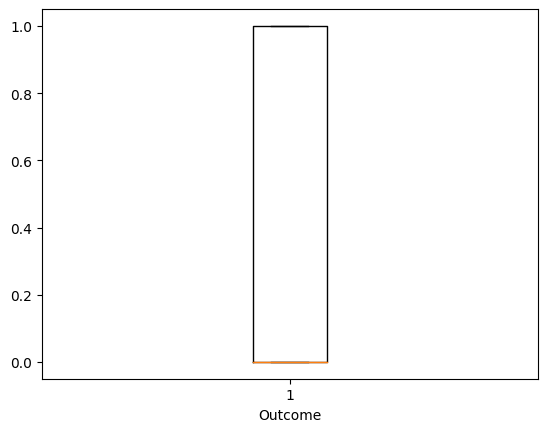

In [9]:
for col in df.columns:
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [10]:
out_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [11]:
#for i in out_col:
#    Q1 = df[i].quantile(0.25)
#    Q3 = df[i].quantile(0.75)
#    IQR=Q3-Q1
#    UW=Q3+1.5*IQR
#    LW=Q1-1.5*IQR
#    df1=df[(df[i]>=LW) & (df[i]<=UW)]    

In [12]:
df1 = df

### Getting a correlation matrix

<AxesSubplot: >

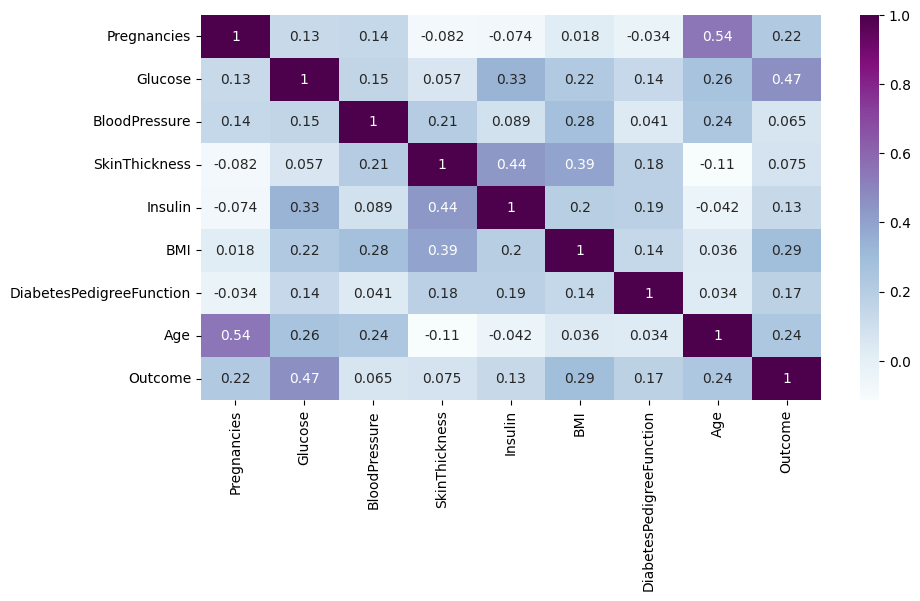

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

### Applying Variance Inflation Factor to check and remove multicollinearity 

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
cols=[]
for col in df1.columns:
    if(col!='Outcome'): 
        cols.append(col)

In [15]:
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [16]:
x = df[cols]
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,Pregnancies,3.275748
1,Glucose,16.725078
2,BloodPressure,14.619512
3,SkinThickness,4.008696
4,Insulin,2.063689
5,BMI,18.408884
6,DiabetesPedigreeFunction,3.195626
7,Age,13.492985


In [17]:
x.drop(['BMI'], axis = 1 , inplace =True )

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_9844\158147197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['BMI'], axis = 1 , inplace =True )


In [18]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,Pregnancies,3.272901
1,Glucose,13.573749
2,BloodPressure,12.372453
3,SkinThickness,3.475236
4,Insulin,2.033589
5,DiabetesPedigreeFunction,3.151598
6,Age,13.381319


In [19]:
x.drop(['Glucose'], axis = 1 , inplace =True )

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_9844\161837722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['Glucose'], axis = 1 , inplace =True )


In [20]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,Pregnancies,3.266130
1,BloodPressure,9.940457
2,SkinThickness,3.475014
3,Insulin,1.859553
4,DiabetesPedigreeFunction,3.026709
5,Age,10.896809


In [21]:
x.drop(['Age'], axis = 1 , inplace =True )

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_9844\4287928440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['Age'], axis = 1 , inplace =True )


In [22]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF values
0,Pregnancies,2.306086
1,BloodPressure,5.288085
2,SkinThickness,3.447548
3,Insulin,1.857940
4,DiabetesPedigreeFunction,2.897474


In [23]:
x = df1[['Pregnancies','BloodPressure','SkinThickness','Insulin','DiabetesPedigreeFunction']]

y = df1[['Outcome']]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2000)

### Applying Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
lo_model=LogisticRegression()

In [27]:
lo_model

LogisticRegression()

In [28]:
lo_model.fit(x_train,y_train)

C:\Users\Shreyas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
lo_pred=lo_model.predict(x_test)

In [30]:
lo_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

In [31]:
value_counts = np.bincount(lo_pred)
count_0 = value_counts[0]
count_1 = value_counts[1]

print(count_0,count_1)

134 20


In [32]:
y_test

,Outcome
324,0
253,0
73,0
222,0
367,0
...,...
353,0
630,1
247,0
445,1


In [33]:
y2 = y_test.value_counts()
y2

Outcome
0          108
1           46
dtype: int64

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
accuracy_score(lo_pred,y_test)

0.7662337662337663

In [36]:
confusion_matrix(lo_pred,y_test)

array([[103,  31],
       [  5,  15]], dtype=int64)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(lo_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       134
           1       0.33      0.75      0.45        20

    accuracy                           0.77       154
   macro avg       0.64      0.76      0.65       154
weighted avg       0.87      0.77      0.80       154



--------------------------------------------------------------------------------------------------------------------------------

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
li_model=LinearRegression()

In [39]:
li_model

LinearRegression()

In [40]:
li_model.fit(x_train,y_train)

LinearRegression()

In [41]:
y_pred=li_model.predict(x_test)

In [42]:
y_pred

array([[0.21099633],
       [0.16473222],
       [0.40150772],
       [0.37879593],
       [0.15371925],
       [0.23413192],
       [0.14944018],
       [0.28452521],
       [0.35460576],
       [0.30946143],
       [0.39869951],
       [0.19488444],
       [0.28890423],
       [0.30846332],
       [0.22736819],
       [0.32333607],
       [0.23504299],
       [0.25006187],
       [0.50366164],
       [0.22205735],
       [0.24969646],
       [0.30758662],
       [0.41819468],
       [0.29071729],
       [0.28212978],
       [0.25909568],
       [0.77551881],
       [0.54708203],
       [0.26266556],
       [0.33716031],
       [0.33741628],
       [0.23357911],
       [0.17311655],
       [0.30205691],
       [0.20488896],
       [0.32342229],
       [0.46065639],
       [0.24395962],
       [0.28042973],
       [0.33052738],
       [0.45801619],
       [0.29994007],
       [0.36721117],
       [0.17463361],
       [0.17422666],
       [0.33180198],
       [0.28382111],
       [0.461

In [43]:
y_test

,Outcome
324,0
253,0
73,0
222,0
367,0
...,...
353,0
630,1
247,0
445,1


In [44]:
from sklearn.metrics import *

In [45]:
r2_score(y_test,y_pred)

0.12745987597766184

--------------------------------------------------------------------------------------------------------------------------------

## Conclusion:

### Diabetes data is studied and mostly Insulin, Blood Pressure, Skin Thickness, Diabetes Pedigree Function and Pregnancies are the factors affecting the outcome.
### Variance Inflation Factor is applied to remove multicollinearity.
### Logistic regression classifier is used as a model to predict the outcome.
### The accuray of the logistic regression model is 77%.
### Ouliers do not affect the accuracy of the logistic regression model. After removing outliers, the accuracy was hardly changed.
### The linear regression cannot be used dut to poor accuracy. 
### Pycaret analysis infers that the logistic regression model is the best fit for the given case.